# Swap Test
Gary Hoppenworth

sources: lecture notes, slides, [wikipedia](https://en.wikipedia.org/wiki/Swap_test)

## Building $\psi_2$ given $\theta$

In [0]:
import numpy as np
import math
def build_psi(theta):
  output = np.array([math.cos(2 * math.pi * theta), math.sin(2 * math.pi * theta) ])
  return output

## Performing Swap Test
The input of `swap_test` will be a number $\theta \in [0, 1)$ used to construct $\psi_2$, and the output will be the probability that "0" is measured.

In [0]:
def swap_test(theta):
  ket_0 = np.array([1, 0])
  ket_1 = np.array([0, 1])
  psi_1 = ket_0
  psi_2 = build_psi(theta)
  H_coeff = 1.0 / math.sqrt(2)

  #initial state is |0, psi_1, psi_2>
  state = np.kron( np.kron(ket_0, psi_1), psi_2)

  #Hadamard gate
  state = H_coeff * (np.kron( np.kron(ket_0, psi_1), psi_2) + np.kron( np.kron(ket_1, psi_1), psi_2))

  #Controlled SWAP gate
  state = H_coeff * (np.kron( np.kron(ket_0, psi_1), psi_2) + np.kron( np.kron(ket_1, psi_2), psi_1))

  #final Hadamard gate
  state = 0.5 * (  np.kron( np.kron(ket_0, psi_1), psi_2 ) +  
                   np.kron( np.kron(ket_1, psi_1), psi_2 ) + 
                   np.kron( np.kron(ket_0, psi_2), psi_1 ) - 
                   np.kron( np.kron(ket_1, psi_2), psi_1 )
                 )
   
  #our final state
  phi = state

  #Now we must calculate the probability of measuring "0"
  P = np.zeros((2, 2))
  P[0, 0] = 1
  I = np.identity(4)
  P = np.kron(P, I)

  prob = np.dot(P, phi)
  final_prob = np.dot(prob, prob)
  return final_prob

## Sanity Check
We proved in class that $Pr(0) = \frac{1}{2} + \frac{1}{2} (|<\psi_1|\psi_2 >|^2)$

### Test 1: 
$\theta = 0$

In [3]:
#swap_test
theta = 0
print(swap_test(theta))

1.0


In [4]:
#expected output
psi_1 = np.array([1.0, 0.0])
psi_2 = build_psi(theta)

prob = 0.5 + 0.5 * float(np.dot(psi_1, psi_2)) ** 2
print(prob)

1.0


### Test 2:
$\theta = 0.25$

In [5]:
#swap_test
theta = 0.25
print(swap_test(theta))

0.5


In [6]:
#expected output
psi_1 = np.array([1.0, 0.0])
psi_2 = build_psi(theta)

prob = 0.5 + 0.5 * float(np.dot(psi_1, psi_2)) ** 2
print(prob)

0.5


## Plotting the dependence of $Pr(0)$ on $\theta$

Text(0, 0.5, 'Probability of output 0')

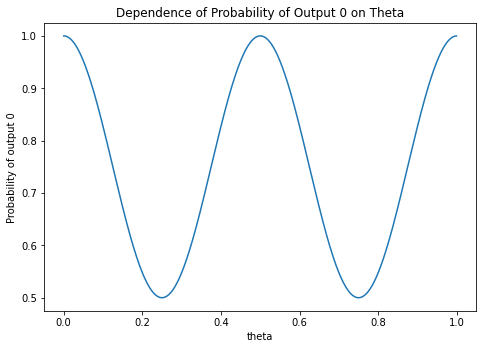

In [7]:
from matplotlib import pyplot as plt
X = np.arange(0, 1, 0.001)
Y = np.array([float(swap_test(x)) for x in X.tolist()])
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(X, Y)
ax.set_title("Dependence of Probability of Output 0 on Theta")
ax.set_xlabel('theta')
ax.set_ylabel('Probability of output 0')

This figure makes sense! When $\theta = \frac{1}{4} * 2 \pi$ or $\theta = \frac{3}{4} * 2 \pi$, Then $\psi_2 = |1>$ or $\psi_2 = -|1>$, and $\psi_1$ and $\psi_2$ are orthogonal, so the probability of measuring $0$ is equal $0.5$, the minimum. Likewise, when $\theta = 0$ or $\theta = 2 \pi$, it follows that $\psi_1 = \psi_2$, and the probability of measuring $0$ is equal to $1.0$, the maximum. 

The Swap Test allows us to determine how *close* two quantum states $\psi_1$ and $\psi_2$ are, and the above graph reflects that fact.